# PoliStock Data Gathering

This notebook demonstrates how we used the Yahoo Finance API to pull closing data for four S&P 500 sectors as well as the S&P 500 index as a whole. 
We pulled the data for each sector and dropped unnecessary columns.  We also checked the data for null values and made sure the formatting was correct. 
Then we concatenated our dataframes into one and sliced it into time periods that we'll use for our analysis.

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
import numpy as np
from yahoo_fin.stock_info import get_data
import yahoo_fin.stock_info as si
import seaborn as sns

%matplotlib inline

### Use Yahoo Finance API to pull stock data from four S&P 500 sectors - Energy (XLE), Finance (XLF), Technology (XLK), Healthcare (XLV) - and the S&P 500 index

In [2]:
# Pull daily stock data for S&P Energy Sector Fund from 2000 through current date
XLE_daily = get_data("XLE", start_date="01/01/2000", end_date="09/24/2021", index_as_date = True, interval="1d")
XLE_daily

,open,high,low,close,adjclose,volume,ticker
2000-01-03,27.312500,27.312500,26.375000,26.562500,15.663605,380300,XLE
2000-01-04,26.312500,26.312500,25.875000,26.062500,15.368750,722200,XLE
2000-01-05,26.125000,26.750000,26.000000,26.750000,15.774166,337800,XLE
2000-01-06,26.750000,27.843750,26.750000,27.781250,16.382280,133100,XLE
2000-01-07,27.687500,28.406250,27.687500,28.078125,16.557346,468000,XLE
...,...,...,...,...,...,...,...
2021-09-17,49.439999,50.220001,49.189999,49.320000,48.728001,32229500,XLE
2021-09-20,47.549999,47.810001,46.470001,47.240002,47.240002,42830000,XLE
2021-09-21,47.799999,48.049999,46.849998,47.349998,47.349998,25661700,XLE
2021-09-22,48.150002,49.380001,48.150002,48.810001,48.810001,39626100,XLE


In [3]:
# Drop unneeded columns and rename the last column to be specific to this DataFrame
XLE_close = XLE_daily.drop(columns=['open', 'high', 'low', 'adjclose', 'volume', 'ticker']).rename(columns = {'close': 'XLE Close'})
XLE_close

,XLE Close
2000-01-03,26.562500
2000-01-04,26.062500
2000-01-05,26.750000
2000-01-06,27.781250
2000-01-07,28.078125
...,...
2021-09-17,49.320000
2021-09-20,47.240002
2021-09-21,47.349998
2021-09-22,48.810001


In [4]:
# Confirm data has no null values and is in float format
XLE_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5467 entries, 2000-01-03 to 2021-09-23
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   XLE Close  5467 non-null   float64
dtypes: float64(1)
memory usage: 85.4 KB


In [5]:
# Pull daily stock data for S&P Financial Sector Fund from 2000 through current date
# Drop unneeded columns and rename the last column to be specific to this DataFrame
XLF_daily = get_data("XLF", start_date="01/01/2000", end_date="09/24/2021", index_as_date = True, interval="1d")
XLF_close = XLF_daily.drop(columns=['open', 'high', 'low', 'adjclose', 'volume', 'ticker']).rename(columns = {'close': 'XLF Close'})
XLF_close

,XLF Close
2000-01-03,18.582453
2000-01-04,17.770105
2000-01-05,17.630484
2000-01-06,18.404753
2000-01-07,18.709383
...,...
2021-09-17,37.580002
2021-09-20,36.549999
2021-09-21,36.500000
2021-09-22,37.110001


In [6]:
# Confirm data has no null values and is in float format
XLF_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5467 entries, 2000-01-03 to 2021-09-23
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   XLF Close  5467 non-null   float64
dtypes: float64(1)
memory usage: 85.4 KB


In [7]:
# Pull daily stock data for S&P Technology Sector Fund from 2000 through current date
# Drop unneeded columns and rename the last column to be specific to this DataFrame
XLK_daily = get_data("XLK", start_date="01/01/2000", end_date="09/24/2021", index_as_date = True, interval="1d")
XLK_close = XLK_daily.drop(columns=['open', 'high', 'low', 'adjclose', 'volume', 'ticker']).rename(columns = {'close': 'XLK Close'})
XLK_close

,XLK Close
2000-01-03,55.437500
2000-01-04,52.625000
2000-01-05,51.843750
2000-01-06,50.125000
2000-01-07,51.000000
...,...
2021-09-17,155.479996
2021-09-20,152.380005
2021-09-21,152.440002
2021-09-22,154.529999


In [8]:
# Confirm data has no null values and is in float format
XLK_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5467 entries, 2000-01-03 to 2021-09-23
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   XLK Close  5467 non-null   float64
dtypes: float64(1)
memory usage: 85.4 KB


In [9]:
# Pull daily stock data for S&P Health Care Sector Fund from 2000 through current date
# Drop unneeded columns and rename the last column to be specific to this DataFrame
XLV_daily = get_data("XLV", start_date="01/01/2000", end_date="09/24/2021", index_as_date = True, interval="1d")
XLV_close = XLV_daily.drop(columns=['open', 'high', 'low', 'adjclose', 'volume', 'ticker']).rename(columns = {'close': 'XLV Close'})
XLV_close

,XLV Close
2000-01-03,30.296875
2000-01-04,29.609375
2000-01-05,29.343750
2000-01-06,29.437500
2000-01-07,29.796875
...,...
2021-09-17,133.000000
2021-09-20,131.149994
2021-09-21,131.350006
2021-09-22,131.570007


In [10]:
# Confirm data has no null values and is in float format
XLV_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5467 entries, 2000-01-03 to 2021-09-23
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   XLV Close  5467 non-null   float64
dtypes: float64(1)
memory usage: 85.4 KB


In [11]:
# Pull daily stock data for S&P 500 Index from 2000 through current date
# Drop unneeded columns and rename the last column to be specific to this DataFrame
spy_daily = get_data("spy", start_date="01/01/2000", end_date="09/24/2021", index_as_date = True, interval="1d")
spy_close = spy_daily.drop(columns=['open', 'high', 'low', 'adjclose', 'volume', 'ticker']).rename(columns = {'close': 'SPY Close'})
spy_close

,SPY Close
2000-01-03,145.437500
2000-01-04,139.750000
2000-01-05,140.000000
2000-01-06,137.750000
2000-01-07,145.750000
...,...
2021-09-17,441.399994
2021-09-20,434.040009
2021-09-21,433.630005
2021-09-22,437.859985


In [12]:
# Confirm data has no null values and is in float format
spy_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5467 entries, 2000-01-03 to 2021-09-23
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SPY Close  5467 non-null   float64
dtypes: float64(1)
memory usage: 85.4 KB


In [13]:
# Join DataFrames for all S&P500 financial sectors plus the S&P 500 Index to be analyzed
sector_data = pd.concat([XLE_close, XLF_close, XLK_close, XLV_close,spy_close], axis='columns', join='inner')
sector_data.sort_index(inplace=True)
sector_data

,XLE Close,XLF Close,XLK Close,XLV Close,SPY Close
2000-01-03,26.562500,18.582453,55.437500,30.296875,145.437500
2000-01-04,26.062500,17.770105,52.625000,29.609375,139.750000
2000-01-05,26.750000,17.630484,51.843750,29.343750,140.000000
2000-01-06,27.781250,18.404753,50.125000,29.437500,137.750000
2000-01-07,28.078125,18.709383,51.000000,29.796875,145.750000
...,...,...,...,...,...
2021-09-17,49.320000,37.580002,155.479996,133.000000,441.399994
2021-09-20,47.240002,36.549999,152.380005,131.149994,434.040009
2021-09-21,47.349998,36.500000,152.440002,131.350006,433.630005
2021-09-22,48.810001,37.110001,154.529999,131.570007,437.859985


### Slice concatenated dataframe into time periods.  Plot each time period to see how the data slices compare to each other.

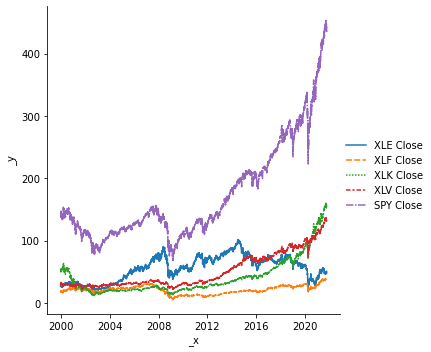

In [14]:
# Plot data for all presidential terms

sns.relplot(data=sector_data, kind = 'line')

In [15]:
# Slice data for three months prior to Election Day

before_election_biden = sector_data.loc['2020-08-3':'2020-11-3']
before_election_trump = sector_data.loc['2016-08-8':'2016-11-8']
before_election_obamab = sector_data.loc['2012-08-6':'2012-11-6']
before_election_obamaa = sector_data.loc['2008-08-4':'2008-11-4']
before_election_bushb = sector_data.loc['2004-08-2':'2004-11-2']
before_election_busha = sector_data.loc['2000-08-4':'2000-11-4']

before_election_range = pd.concat([before_election_biden, before_election_trump, before_election_obamab, before_election_obamaa, before_election_bushb, before_election_busha], axis = 'rows', join= 'inner')
before_election_range

,XLE Close,XLF Close,XLK Close,XLV Close,SPY Close
2020-08-03,36.160000,24.100000,113.150002,106.620003,328.790009
2020-08-04,37.040001,24.000000,113.440002,106.150002,330.059998
2020-08-05,37.430000,24.330000,113.860001,106.639999,332.109985
2020-08-06,37.130001,24.320000,115.459999,106.070000,334.329987
2020-08-07,37.180000,24.840000,113.739998,106.410004,334.570007
...,...,...,...,...,...
2000-10-30,31.656250,23.164602,41.781250,28.843750,140.531250
2000-10-31,31.875000,23.354996,43.718750,29.500000,142.953125
2000-11-01,32.906250,23.253452,42.875000,29.703125,142.468750
2000-11-02,31.750000,23.367689,43.984375,29.968750,142.703125


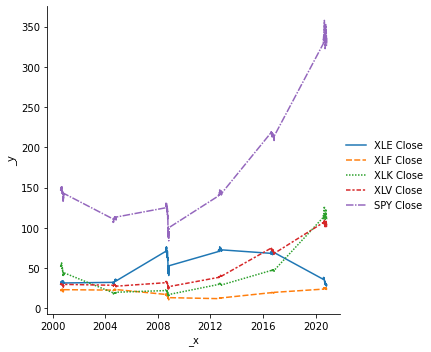

In [16]:
# Plot data for three months prior to Election Day

sns.relplot(data=before_election_range, kind = 'line')

In [17]:
# Slice data for three months after Election Day

after_election_biden = sector_data.loc['2020-11-3':'2021-2-3']
after_election_trump = sector_data.loc['2016-11-8':'2017-2-8']
after_election_obamab = sector_data.loc['2012-11-6':'2013-2-6']
after_election_obamaa = sector_data.loc['2008-11-4':'2009-2-4']
after_election_bushb = sector_data.loc['2004-11-2':'2005-2-2']
after_election_busha = sector_data.loc['2000-11-4':'2001-2-4']

after_election_range = pd.concat([after_election_biden, after_election_trump, after_election_obamab, after_election_obamaa, after_election_bushb, after_election_busha], axis = 'rows', join= 'inner')
after_election_range

,XLE Close,XLF Close,XLK Close,XLV Close,SPY Close
2020-11-03,29.530001,24.850000,113.099998,105.000000,336.029999
2020-11-04,29.570000,24.559999,117.500000,109.660004,343.540009
2020-11-05,29.570000,25.160000,121.150002,109.879997,350.239990
2020-11-06,28.930000,24.959999,121.580002,109.919998,350.160004
2020-11-09,33.060001,27.010000,120.699997,110.949997,354.559998
...,...,...,...,...,...
2001-01-29,31.520000,23.996752,38.160000,29.459999,136.600006
2001-01-30,31.790001,24.207960,38.250000,29.400000,137.800003
2001-01-31,32.130001,23.907393,37.299999,29.219999,137.020004
2001-02-01,31.719999,23.939886,37.279999,29.610001,137.929993


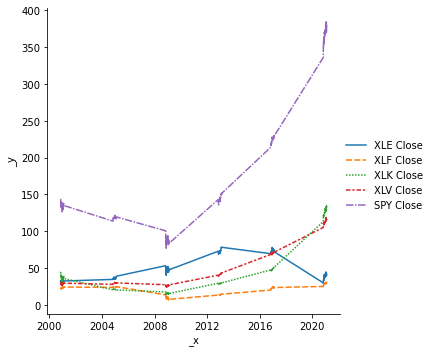

In [18]:
# Plot data for Election Day plus 13 days
sns.relplot(data=after_election_range, kind = 'line')

In [19]:
# Slice data for Inauguration Day plus 13 days

el21 = sector_data.loc['2021-01-20':'2021-02-03']
el17 = sector_data.loc['2017-01-20':'2017-02-03']
el13 = sector_data.loc['2013-01-20':'2013-02-03']
el09 = sector_data.loc['2009-01-20':'2009-02-03']
el05 = sector_data.loc['2005-01-20':'2005-02-03']
el01 = sector_data.loc['2001-01-20':'2001-02-03']

inauguration_range = pd.concat([el21, el17, el13, el09, el05, el01], axis = 'rows', join= 'inner')
inauguration_range

,XLE Close,XLF Close,XLK Close,XLV Close,SPY Close
2021-01-20,43.770000,30.889999,131.639999,118.500000,383.890015
2021-01-21,42.290001,30.559999,133.339996,117.940002,384.239990
2021-01-22,42.070000,30.340000,132.830002,117.589996,382.880005
2021-01-25,41.639999,30.120001,133.940002,118.360001,384.390015
2021-01-26,40.750000,29.879999,134.029999,117.919998,383.790009
...,...,...,...,...,...
2001-01-29,31.520000,23.996752,38.160000,29.459999,136.600006
2001-01-30,31.790001,24.207960,38.250000,29.400000,137.800003
2001-01-31,32.130001,23.907393,37.299999,29.219999,137.020004
2001-02-01,31.719999,23.939886,37.279999,29.610001,137.929993


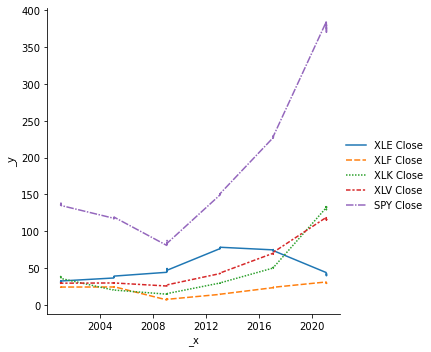

In [20]:
# Plot data for Inauguration Day plus 13 days

sns.relplot(data=inauguration_range, kind = 'line')

In [21]:
# Slice data for the first 100 days of each administration

first_days_biden = sector_data.loc['2021-01-20':'2021-04-30']
first_days_trump = sector_data.loc['2017-01-20':'2017-04-30']
first_days_obamab = sector_data.loc['2013-01-20':'2013-04-30']
first_days_obamaa = sector_data.loc['2009-01-20':'2009-04-30']
first_days_bushb = sector_data.loc['2005-01-20':'2005-04-30']
first_days_busha = sector_data.loc['2001-01-20':'2001-04-30']

first_days_range = pd.concat([first_days_biden, first_days_trump, first_days_obamab, first_days_obamaa, first_days_bushb, first_days_busha], axis = 'rows', join= 'inner')
first_days_range

,XLE Close,XLF Close,XLK Close,XLV Close,SPY Close
2021-01-20,43.770000,30.889999,131.639999,118.500000,383.890015
2021-01-21,42.290001,30.559999,133.339996,117.940002,384.239990
2021-01-22,42.070000,30.340000,132.830002,117.589996,382.880005
2021-01-25,41.639999,30.120001,133.940002,118.360001,384.390015
2021-01-26,40.750000,29.879999,134.029999,117.919998,383.790009
...,...,...,...,...,...
2001-04-24,32.970001,21.900894,27.900000,28.389999,121.580002
2001-04-25,33.439999,22.136475,28.389999,28.719999,123.169998
2001-04-26,34.099998,22.225834,27.990000,29.080000,123.720001
2001-04-27,33.869999,22.705118,28.370001,28.799999,125.779999


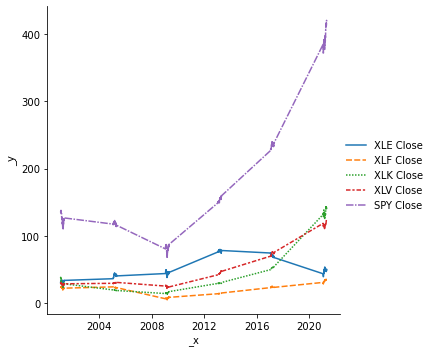

In [22]:
# Plot data for the first 100 days
sns.relplot(data=first_days_range, kind = 'line')

<AxesSubplot:>

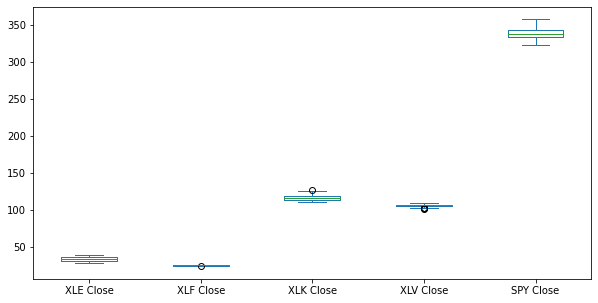

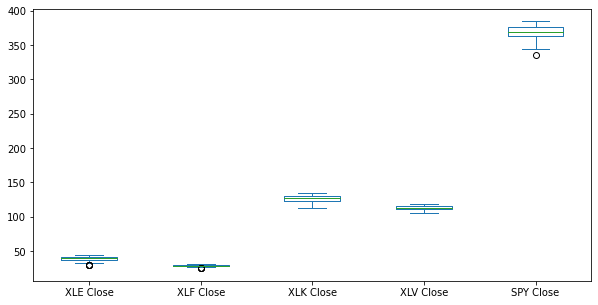

In [39]:
before_election_biden.plot.box(figsize=(10,5))
after_election_biden.plot.box(figsize=(10,5))

<AxesSubplot:>

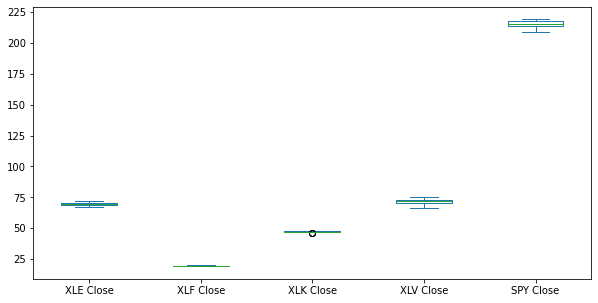

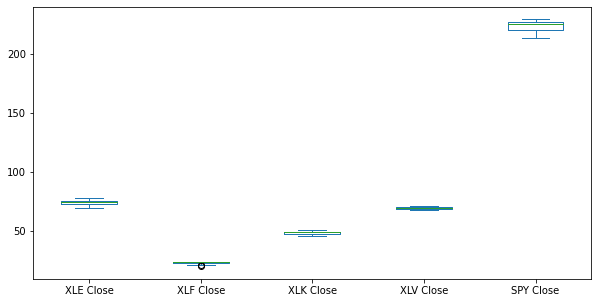

In [40]:
before_election_trump.plot.box(figsize=(10,5))
after_election_trump.plot.box(figsize=(10,5))

### Calculate daily returns for each sector and the S&P 500 index.

In [24]:
# Define a function to calculate daily returns
def daily_returns(df):
    df_daily_returns = df.pct_change().dropna()
    return df_daily_returns

In [25]:
# Calculate the daily returns for all terms
daily_returns(sector_data)

,XLE Close,XLF Close,XLK Close,XLV Close,SPY Close
2000-01-04,-0.018824,-0.043716,-0.050733,-0.022692,-0.039106
2000-01-05,0.026379,-0.007857,-0.014846,-0.008971,0.001789
2000-01-06,0.038551,0.043916,-0.033153,0.003195,-0.016071
2000-01-07,0.010686,0.016552,0.017456,0.012208,0.058076
2000-01-10,-0.008347,-0.017639,0.037990,0.102255,0.003431
...,...,...,...,...,...
2021-09-17,-0.007446,-0.004503,-0.015576,0.000978,-0.012903
2021-09-20,-0.042174,-0.027408,-0.019938,-0.013910,-0.016674
2021-09-21,0.002328,-0.001368,0.000394,0.001525,-0.000945
2021-09-22,0.030834,0.016712,0.013710,0.001675,0.009755


In [26]:
# Calculate the daily returns for three months prior to Election Day
daily_returns(before_election_range)

,XLE Close,XLF Close,XLK Close,XLV Close,SPY Close
2020-08-04,0.024336,-0.004149,0.002563,-0.004408,0.003863
2020-08-05,0.010529,0.013750,0.003702,0.004616,0.006211
2020-08-06,-0.008015,-0.000411,0.014052,-0.005345,0.006685
2020-08-07,0.001347,0.021382,-0.014897,0.003205,0.000718
2020-08-10,0.030931,0.007246,-0.002813,-0.003383,0.002989
...,...,...,...,...,...
2000-10-30,0.017068,0.036343,-0.013648,0.019326,0.008975
2000-10-31,0.006910,0.008219,0.046372,0.022752,0.017234
2000-11-01,0.032353,-0.004348,-0.019299,0.006886,-0.003388
2000-11-02,-0.035138,0.004913,0.025875,0.008943,0.001645


In [27]:
# Calculate the daily returns for three months after Election Day
daily_returns(after_election_range)

,XLE Close,XLF Close,XLK Close,XLV Close,SPY Close
2020-11-04,0.001355,-0.011670,0.038904,0.044381,0.022349
2020-11-05,0.000000,0.024430,0.031064,0.002006,0.019503
2020-11-06,-0.021644,-0.007949,0.003549,0.000364,-0.000228
2020-11-09,0.142758,0.082131,-0.007238,0.009370,0.012566
2020-11-10,0.032365,0.005183,-0.018641,0.002884,-0.001467
...,...,...,...,...,...
2001-01-29,-0.008220,0.000826,0.021003,0.016410,0.005336
2001-01-30,0.008566,0.008802,0.002358,-0.002037,0.008785
2001-01-31,0.010695,-0.012416,-0.024837,-0.006122,-0.005660
2001-02-01,-0.012761,0.001359,-0.000536,0.013347,0.006641


In [28]:
# Calculate the daily returns for the first 100 days of each administration
daily_returns(first_days_range)

,XLE Close,XLF Close,XLK Close,XLV Close,SPY Close
2021-01-21,-0.033813,-0.010683,0.012914,-0.004726,0.000912
2021-01-22,-0.005202,-0.007199,-0.003825,-0.002968,-0.003539
2021-01-25,-0.010221,-0.007251,0.008357,0.006548,0.003944
2021-01-26,-0.021374,-0.007968,0.000672,-0.003717,-0.001561
2021-01-27,-0.013497,-0.029451,-0.018876,-0.030360,-0.024440
...,...,...,...,...,...
2001-04-24,0.001823,-0.005166,-0.015526,0.002826,-0.005399
2001-04-25,0.014255,0.010757,0.017563,0.011624,0.013078
2001-04-26,0.019737,0.004037,-0.014089,0.012535,0.004465
2001-04-27,-0.006745,0.021564,0.013576,-0.009629,0.016650


In [29]:
# Define a function to calculate the standard deviation of daily returns
def standard_deviation(df):
    df_standard_deviation = df.std()
    return df_standard_deviation

In [49]:
# Calculate thestandard deviation for all terms
std = standard_deviation(sector_data)
std

XLE Close    19.776477
XLF Close     6.309189
XLK Close    29.617997
XLV Close    27.805574
SPY Close    79.958398
dtype: float64

In [44]:
# Calculate the standard deviation for three months prior to Election Day
before_election_std = standard_deviation(before_election_range)
before_election_std

XLE Close    18.485452
XLF Close     4.443077
XLK Close    33.496550
XLV Close    28.959051
SPY Close    80.198165
dtype: float64

In [42]:
# Calculate the standard deviation for Election Day plus 13 days
after_election_std = standard_deviation(after_election_range)

In [33]:
# Calculate the standard deviation for Inauguration Day plus 13 days
standard_deviation(first_days_range)

XLE Close     16.480628
XLF Close      8.266321
XLK Close     41.546364
XLV Close     33.163136
SPY Close    106.267626
dtype: float64

<AxesSubplot:>

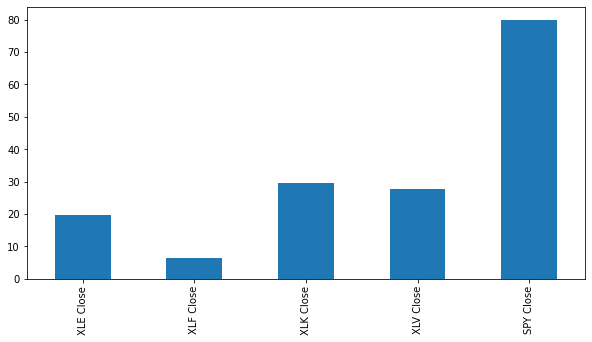

In [48]:
std.plot.bar(figsize=(10,5))

<AxesSubplot:>

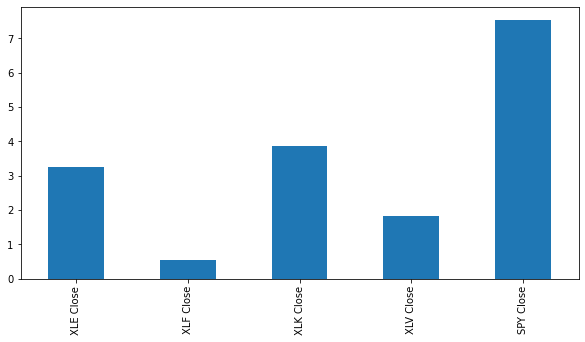

In [54]:
before_election_biden_std = standard_deviation(before_election_biden)
after_election_biden_std = standard_deviation(after_election_biden)


before_election_biden_std.plot.bar(figsize=(10,5))

<AxesSubplot:>

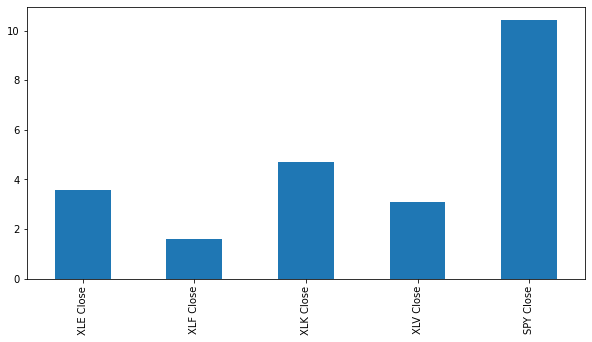

In [55]:
after_election_biden_std.plot.bar(figsize=(10,5))

In [81]:
combined_biden = pd.concat([before_election_biden_std, after_election_biden_std], axis = 'columns', join= 'inner')

combined_biden.columns = ['Before'],['After']
combined_biden

,"(Before,)","(After,)"
XLE Close,3.264641,3.591761
XLF Close,0.550069,1.585715
XLK Close,3.858567,4.690815
XLV Close,1.838505,3.079944
SPY Close,7.535620,10.430641


<AxesSubplot:>

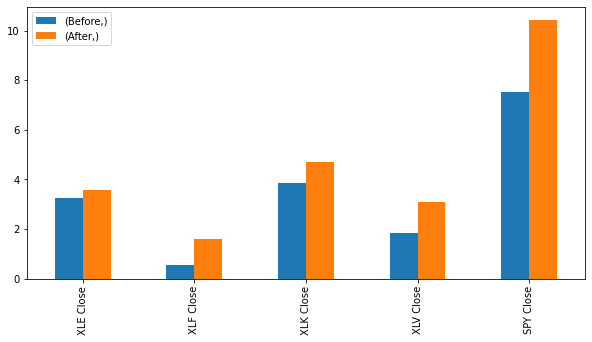

In [82]:
combined_biden.plot.bar(figsize=(10,5))

<AxesSubplot:>

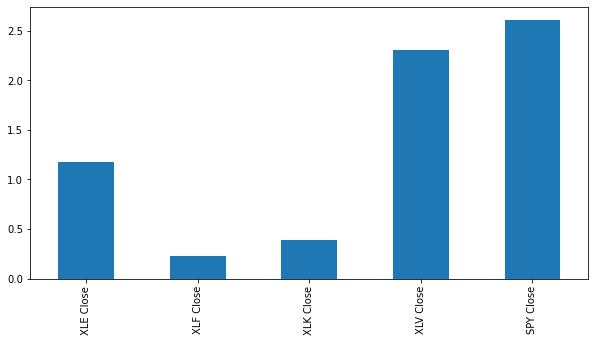

In [57]:
before_election_trump_std = standard_deviation(before_election_trump)
after_election_trump_std = standard_deviation(after_election_trump)

before_election_trump_std.plot.bar(figsize=(10,5))